# Tutorial Exercises

In these exercises you will practice:
* Creating plots with Python
* Choosing appropriate plots for the question at hand
* Tweaking plots to make clear the important features of the data
* Adding comments that make the interpretation of plots clear

We will use some of the exammple datasets provided with `s

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Load and inspect data

We will use the Oxford weather station data. 
In some of the exercises we will also use data from the Cambridge weather station.

In [2]:
OxWeather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/OxfordWeather.csv")
OxWeather.head()

,YYYY,MM,DD,Tmax,Tmin,Tmean,Trange,Rainfall_mm
0,1827,1,1,8.3,5.6,7.0,2.7,0.0
1,1827,1,2,2.2,0.0,1.1,2.2,0.0
2,1827,1,3,-2.2,-8.3,-5.3,6.1,9.7
3,1827,1,4,-1.7,-7.8,-4.8,6.1,0.0
4,1827,1,5,0.0,-10.6,-5.3,10.6,0.0


In [3]:
CamWeather = pd.read_csv('../data/CambridgeWeather.csv')
CamWeather.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1959,1,4.4,-1.4,20,NaN,78.1
1,1959,2,7.5,1.2,9,NaN,66.0
2,1959,3,11.5,3.8,0,NaN,98.0
3,1959,4,14.3,5.4,0,NaN,146.1
4,1959,5,18.1,6.5,0,NaN,224.8


**Note** that the dataframes don't match:
* The column names are different in the Oxford and Cambridge datasets
* Whilst the Oxford dataset has one entry (row) per day, the Cambridge dataset has only one entry per month
* the range of years covered is different

These points will be relevant when you want to work with the data, especially when comparing between datasets

## Question 1

A couple are planning their wedding in Oxford. They would like to know which month has the most rain-free days. Produce a graph to help them.

<Axes: xlabel='MM', ylabel='rainfree'>

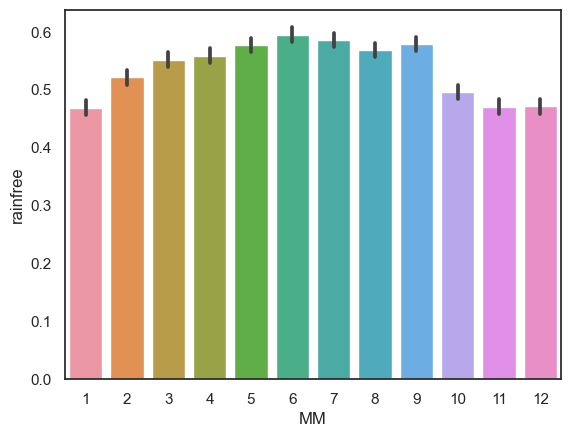

In [4]:
# Your code here
OxWeather['rainfree']=(OxWeather.Rainfall_mm<=0)
sns.barplot(data=OxWeather, x='MM', y='rainfree')

Please add some comments here!

# Question 2

Is Oxford getting warmer?!

Plot the mean temperature for each year in the dataset to find out.

<Axes: xlabel='YYYY', ylabel='Tmax'>

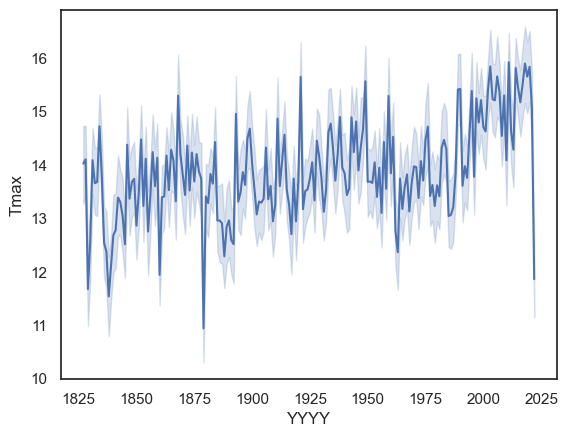

In [5]:
# your graph here
sns.lineplot(data=OxWeather, x='YYYY', y='Tmax')

## Question 3

Helen moved from Cambridge to Oxford. Sitting in the pub in the rain, she complained that it rains far more in Oxford than in Cambridge. Provide one or more graphs, and some suitable descriptive statistics, to support or contradict Helen's claim.

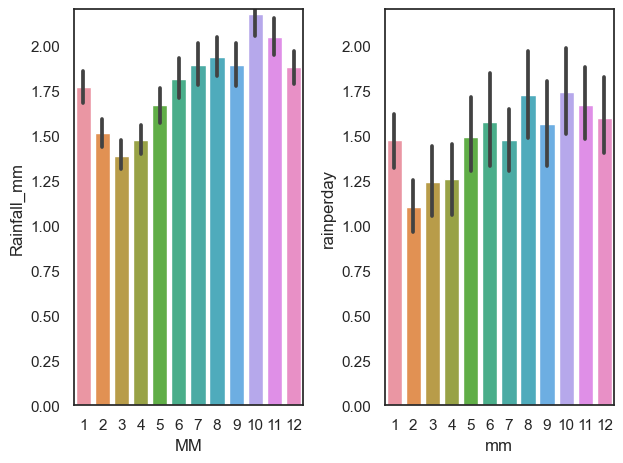

In [6]:
# Your graph here
plt.subplot(1,2,1)
sns.barplot(data=OxWeather, y='Rainfall_mm', x='MM')
plt.ylim(0,2.2)
plt.subplot(1,2,2)
CamWeather['rainperday']=CamWeather.rain/31
sns.barplot(data=CamWeather, y='rainperday', x='mm')
plt.ylim(0,2.2)

plt.tight_layout()
plt.show()


Please add some comments here!

## Question 3

In the Cambridge dataset, the column `af` gives the number of days (in a month) with *air frost*, ie a minimum temperature below $ 0^{\circ}C $

Is air frost more frequent in Cambridge than Oxford? Plot the average number of days with air frost in Oxford and Cambridge in each month of the year.

Hint: first you will need to add a column to the <tt>OxWeather</tt> dataframe, containing a 1 for days with air frost and a 0 for days without. 

We will cover adding columns in more detail next week, so here is some code:

In [7]:
OxWeather['af']=(OxWeather.Tmin<0)*31
OxWeather

,YYYY,MM,DD,Tmax,Tmin,Tmean,Trange,Rainfall_mm,rainfree,af
0,1827,1,1,8.3,5.6,7.0,2.7,0.0,True,0
1,1827,1,2,2.2,0.0,1.1,2.2,0.0,True,0
2,1827,1,3,-2.2,-8.3,-5.3,6.1,9.7,False,31
3,1827,1,4,-1.7,-7.8,-4.8,6.1,0.0,True,31
4,1827,1,5,0.0,-10.6,-5.3,10.6,0.0,True,31
...,...,...,...,...,...,...,...,...,...,...
71338,2022,4,26,15.2,4.1,9.7,11.1,0.0,True,0
71339,2022,4,27,10.7,2.6,6.7,8.1,0.0,True,0
71340,2022,4,28,12.7,3.9,8.3,8.8,0.0,True,0
71341,2022,4,29,11.7,6.7,9.2,5.0,0.0,True,0


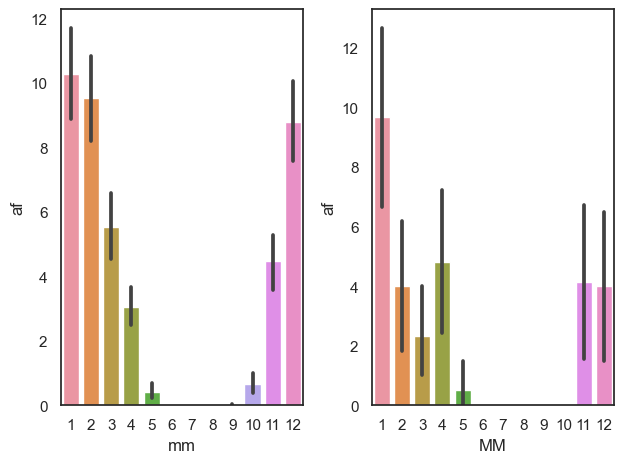

In [8]:
plt.subplot(1,2,1)
sns.barplot(data=CamWeather, y='af', x='mm')

plt.subplot(1,2,2)
sns.barplot(data=OxWeather.query('YYYY >= 2020'), y='af', x='MM')

plt.tight_layout()
plt.show()

In [9]:
CamWeather.sort_values(by='af')

,yyyy,mm,tmax,tmin,af,rain,sun,rainperday
775,2023,8,23.1,12.2,0,62.4,NaN,2.012903
585,2007,10,15.2,7.2,0,56.4,97.3,1.819355
588,2008,1,10.3,3.8,0,58.0,63.2,1.870968
310,1984,11,11.2,5.9,0,87.6,49.0,2.825806
309,1984,10,15.6,7.6,0,48.9,113.5,1.577419
...,...,...,...,...,...,...,...,...
312,1985,1,3.4,-2.2,23,37.3,40.7,1.203226
240,1979,1,2.5,-3.0,23,42.8,56.4,1.380645
325,1986,2,0.8,-4.0,24,10.4,60.2,0.335484
49,1963,2,1.2,-3.5,27,13.2,59.0,0.425806
